In [1]:
### uncomment to display figures
# %matplotlib inline

# Demonstrates benchmarking functionality - OzNet Soil Moisture

In [2]:
from awrams.benchmarking.benchmark import BenchmarkSoilMoisture
from awrams.utils import datetools as dt
import awrams.benchmarking.config as cfg

In [3]:
cfg.MONTHLY_REJECTION_THRESHOLD = 15

### change model soil moisture output variable names
#cfg.SM_MODEL_VARNAMES = ['s0', 'ss', 'sd']
#cfg.SM_MODEL_LAYERS = {'s0': 100., 'ss': 900., 'sd': 5000.}

In [4]:
cfg.SM_MODEL_VARNAMES

['s0_avg', 'ss_avg', 'sd_avg']

In [5]:
cfg.SM_MODEL_LAYERS

{'s0_avg': 100.0, 'sd_avg': 5000.0, 'ss_avg': 900.0}

## Set up comparison
soil moisture comparisons at OzNet sites

In [6]:
oznet_data_path = '../../test_data/benchmarking/oznet/'
site_list = ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9']
mod_site_list = ['Oznet Soilmoisture_' + site for site in site_list]

import awrams.benchmarking.meta.oznet as oznet

oz = BenchmarkSoilMoisture("OzNet", "soil moisture", oznet.meta)
oz.period = dt.dates('2002-2010')

oz.load(oznet_data_path,mod_site_list)

In [7]:
oz.sites

['M2',
 'M4',
 'Y2',
 'M6',
 'Y1',
 'Y3',
 'M5',
 'Y9',
 'M1',
 'M3',
 'Y8',
 'Y5',
 'M7',
 'Y6',
 'Y7',
 'Y4']

## Add models to the comparison
Any number of models can be simulataneously compared

In [8]:
path = oznet_data_path+"/awral_${v}.csv"
oz.add_model("AWRAMSI_v4_0_AWRAL", csv_path=path)

## Plotting
Per-site timeseries and regression plots are available

In [9]:
oz.benchmark.top.selection

['AWRAMSI_v4_0_AWRAL']

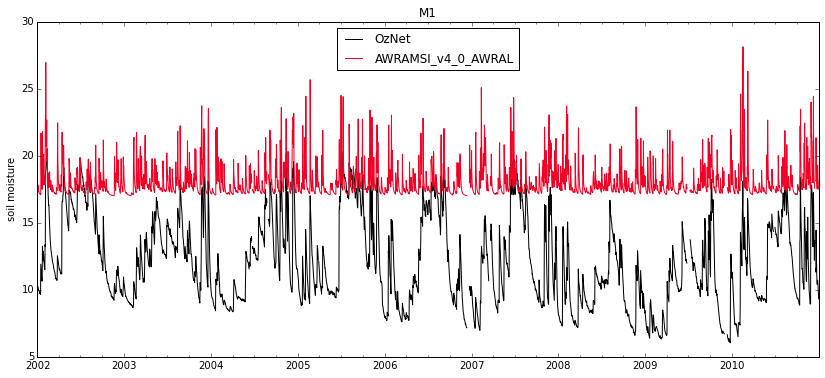

In [10]:
p = oz.benchmark.top.plot_timeseries('M1','d')

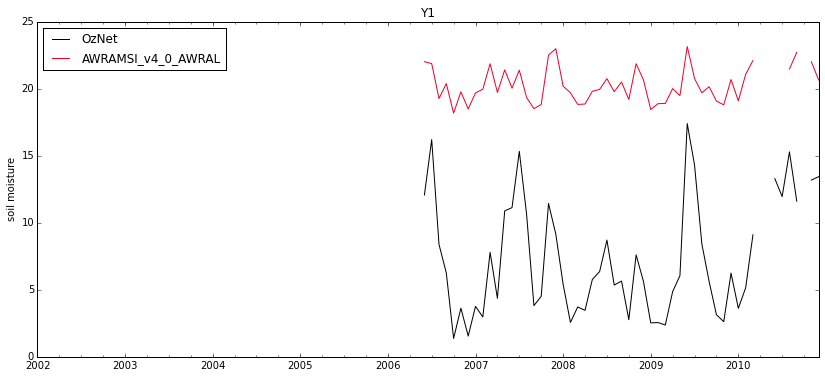

In [11]:
p = oz.benchmark.top.plot_timeseries('Y1',freq='m')

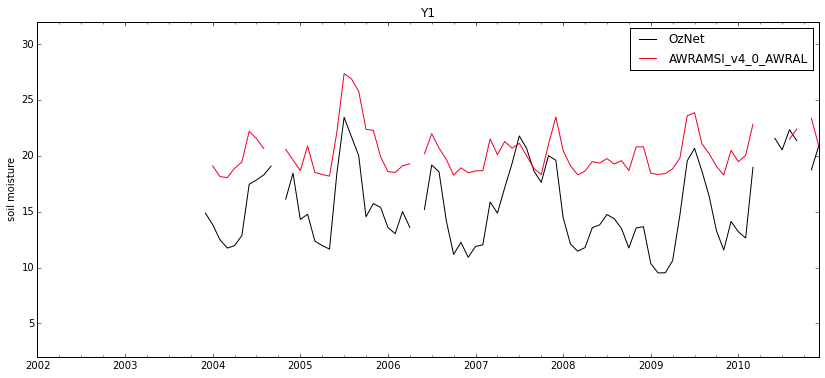

In [12]:
p = oz.benchmark.shallow.plot_timeseries('Y1',freq='m',ylim=[2,32])

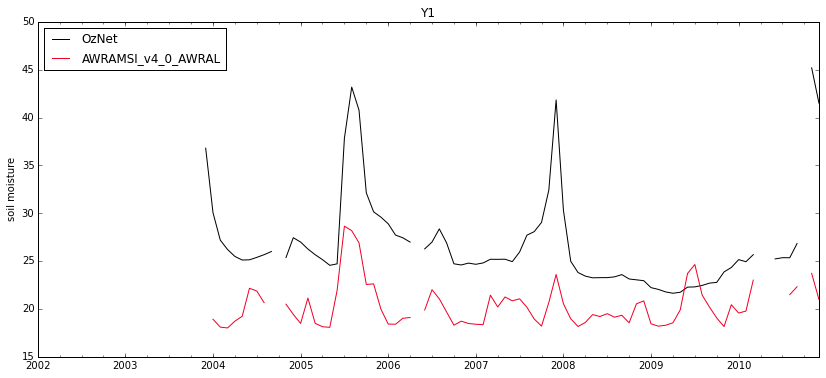

In [13]:
p = oz.benchmark.middle.plot_timeseries('Y1',freq='m')

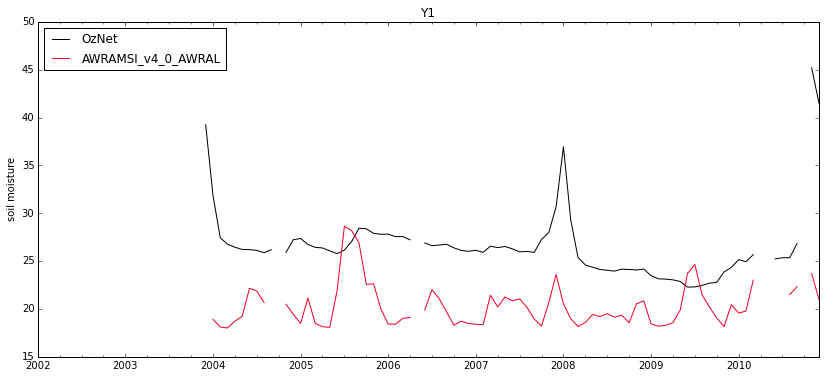

In [14]:
p = oz.benchmark.deep.plot_timeseries('Y1',freq='m')

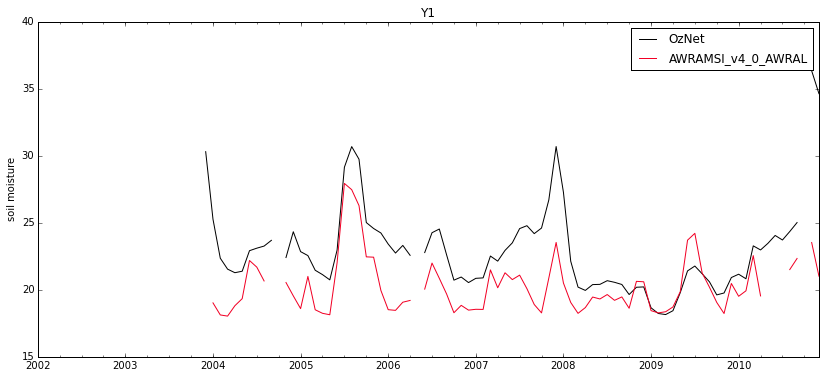

In [15]:
p = oz.benchmark.profile.plot_timeseries('Y1',freq='m')

## View some statistics
Summary percentiles can be printed out by specifying a statistic to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

In [16]:
oz.benchmark.top.stat_percentiles('bias')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-2.705334,-0.719741,2.795134,6.203369,12.586194,18.20971,18.47774


In [17]:
oz.benchmark.top.stat_percentiles('nse','d')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-37.503744,-17.97504,-3.358213,-0.827124,-0.148106,0.142184,0.160418


In [18]:
oz.benchmark.top.data_percentiles()

,0%,5%,25%,50%,75%,95%,100%
OzNet,7.333204,7.619471,9.554107,10.856429,13.582403,15.297512,16.269551
AWRAMSI_v4_0_AWRAL,10.664175,10.703557,12.679681,19.513678,20.375586,28.930418,30.636690


## Stats plotting
As well as CDF and box-plots of the statistics

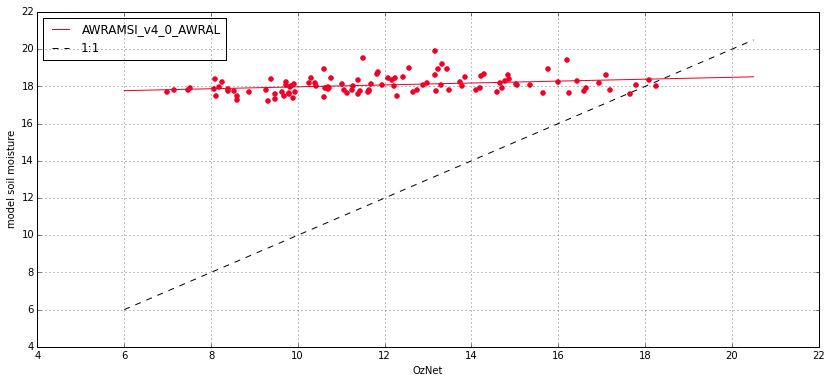

In [19]:
p = oz.benchmark.top.plot_regression('M1') #,ylim=[0,40],xlim=[0,40])

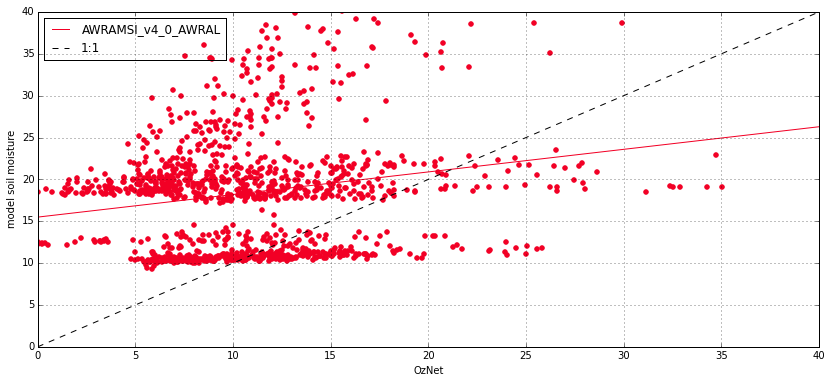

In [20]:
p = oz.benchmark.top.plot_regression(ylim=[0,40],xlim=[0,40])

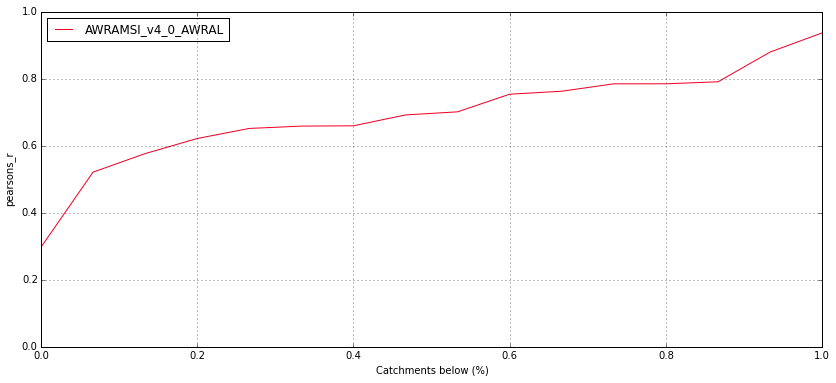

In [21]:
p = oz.benchmark.top.plot_cdf('pearsons_r', ylim=[0,1])

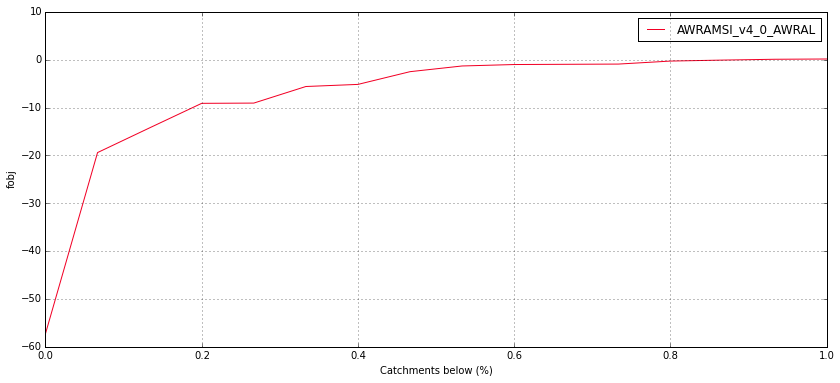

In [22]:
p = oz.benchmark.top.plot_cdf('fobj')

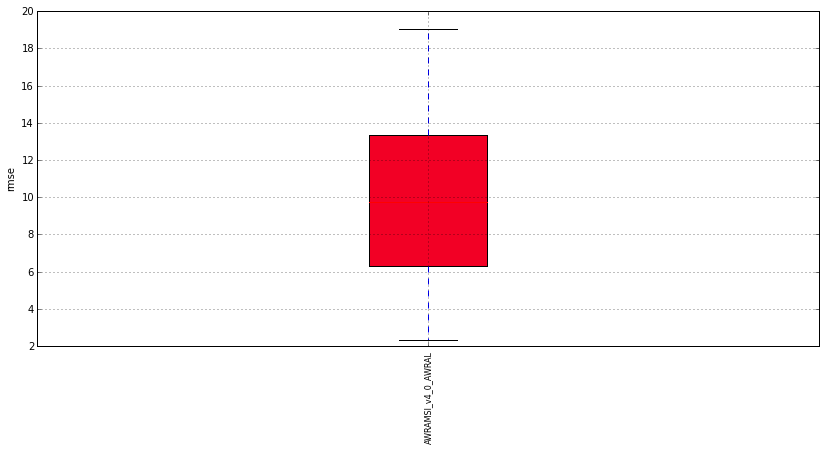

In [23]:
p = ax=oz.benchmark.top.plot_box('rmse','m')